# Programming Exercise 3
# Multi-class Classification and Neural Networks

## Introduction

In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

## Contents

| Section | Part                                 | Submission function                   |  Points 
| :-      |:-                                    | :-                                    |  :-:    
| 1       | [Regularized Logistic Regression](#section1)     | [`lrCostFunction`](#lrCostFunction)   | 30     
| 2       | [One-vs-all classifier training](#section2)       | [`oneVsAll`](#oneVsAll)               | 20     
| 3       | [One-vs-all classifier prediction](#section3)     | [`predictOneVsAll`](#predictOneVsAll) | 20     
| 4       | [Neural Network Prediction Function](#section4)   | [`predict`](#predict)           | 30
|         | Total Points                         |                                 | 100    

## 1 Multi-class Classification


### 1.1 Dataset

In [2]:
input_layer_size  = 400
num_labels = 10
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size

### 1.2 Visualizing the data

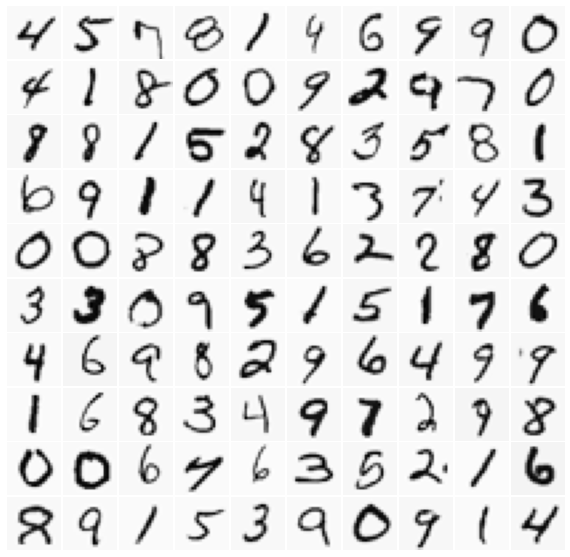

In [3]:
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
utils.displayData(sel)

### 1.3 Vectorizing Logistic Regression

In [4]:
theta_t = np.array([-2, -1, 1, 2], dtype=float)
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3

<a id="section1"></a>
#### 1.3.1 Vectorizing the cost function 

#### 1.3.2 Vectorizing the gradient

<a id="lrCostFunction"></a>

In [5]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    h = utils.sigmoid(X.dot(theta.T))    
    temp = theta
    temp[0] = 0    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp
    return J, grad

#### 1.3.3 Vectorizing regularized logistic regression

In [6]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


<a id="section2"></a>
### 1.4 One-vs-all Classification
<a id="oneVsAll"></a>

In [7]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options)        
        all_theta[c] = res.x
    return all_theta

In [8]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

<a id="section3"></a>
#### 1.4.1 One-vs-all Prediction
<a id="predictOneVsAll"></a>

In [9]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(utils.sigmoid(X.dot(all_theta.T)), axis = 1)
    return p

In [10]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 95.06%


## 2 Neural Networks

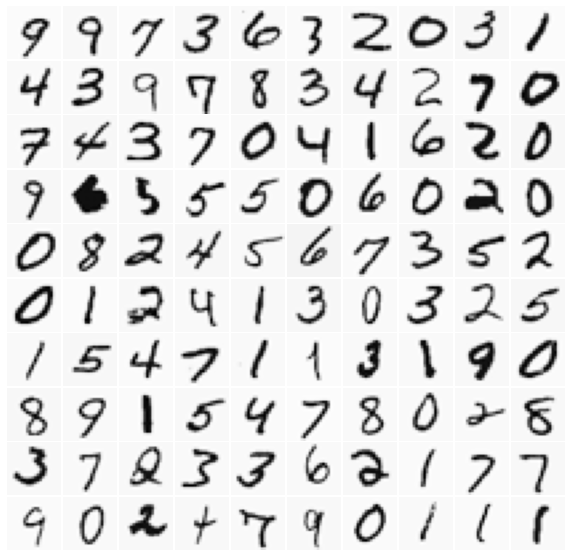

In [11]:
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size
indices = np.random.permutation(m)
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
utils.displayData(sel)

### 2.1 Model representation 

In [12]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
Theta2 = np.roll(Theta2, 1, axis=0)

<a id="section4"></a>
### 2.2 Feedforward Propagation and Prediction

<a id="predict"></a>

In [13]:
def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(X.shape[0])
    X = np.concatenate([np.ones((m, 1)), X], axis=1)    
    a2 = utils.sigmoid(X.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    p = np.argmax(utils.sigmoid(a2.dot(Theta2.T)), axis = 1)
    return p

In [14]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


Neural Network Prediction: 7


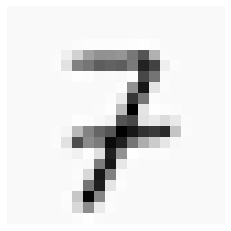

In [20]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')